<a href="https://colab.research.google.com/github/KeitaTakami/WeeklyReport/blob/master/0529/cifar10_missdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install dlt

In [0]:
#dlt=Deep Learning Tools

# parameter
random_AB=0
learningrate=0.001
batch_s=128
change_num=10000
epoch=25
repetition=40
data_num=10000
data_num_ab=int(data_num/2)
import dlt
data=dlt.cifar.load_cifar10()
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
#データの取得,確認
x=data.train_images[:data_num]
x=x.astype('float32')/255.0
print(x.shape)
y=data.train_labels[:data_num]
y=to_categorical(y,10)
print(y.shape)
#print(x[0])
#print(y[0])
#AとBに二分割
x_a,x_b=train_test_split(x,test_size=0.5,random_state=random_AB)
print(x_a.shape)
print(x_b.shape)
y_a,y_b=train_test_split(y,test_size=0.5,random_state=random_AB)
print(y_a.shape)
print(y_b.shape)

(10000, 32, 32, 3)
(10000, 10)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 10)
(5000, 10)


In [0]:
y_a=np.argmax(y_a,axis=1)
y_b=np.argmax(y_b,axis=1)
y_a_num=[]
y_a_num = [0 for i in range(10)]
print(y_a_num)
y_b_num=[]
y_b_num = [0 for i in range(10)]
print(y_b_num)
for i in range(10):
  for k in range(data_num_ab):
    if y_a[k]==i:
      y_a_num[i]+=1
for i in range(10):
  for k in range(data_num_ab):
    if y_b[k]==i:
      y_b_num[i]+=1
print(y_a_num)
print(y_b_num)
y_a=to_categorical(y_a,10)
y_b=to_categorical(y_b,10)
print(y_a.shape)
print(y_b.shape)

y_a_num_history=[]
y_b_num_history=[]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[499, 484, 516, 523, 508, 493, 503, 490, 497, 487]
[506, 490, 516, 493, 491, 444, 527, 511, 528, 494]
(5000, 10)
(5000, 10)


In [0]:
def model():
  model=Sequential()

  # 1層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 2層目
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # 出力層
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

前処理
0回目
Train on 4500 samples, validate on 500 samples
Epoch 1/25
4500/4500 [==============================] - 14s 3ms/step - loss: 2.1910 - accuracy: 0.1782 - val_loss: 2.0304 - val_accuracy: 0.2420
Epoch 2/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.9027 - accuracy: 0.2982 - val_loss: 1.8396 - val_accuracy: 0.3040
Epoch 3/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.7561 - accuracy: 0.3476 - val_loss: 1.7637 - val_accuracy: 0.3320
Epoch 4/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.6624 - accuracy: 0.3909 - val_loss: 1.7750 - val_accuracy: 0.3360
Epoch 5/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.6277 - accuracy: 0.4007 - val_loss: 1.6437 - val_accuracy: 0.3900
Epoch 6/25
4500/4500 [==============================] - 14s 3ms/step - loss: 1.5188 - accuracy: 0.4367 - val_loss: 1.6254 - val_accuracy: 0.4040
Epoch 7/25
4500/4500 [==============================] - 14s 3ms/step - loss

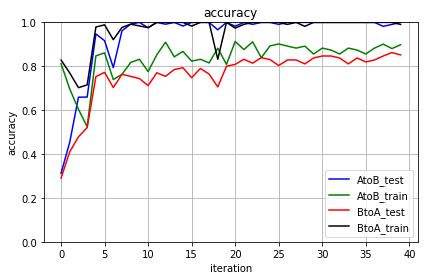

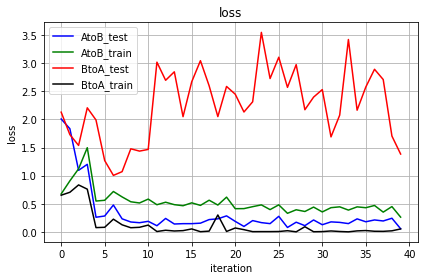

    airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0        311         246   413  450   395  314   263    295   174    220
1        149         129   164  150    78   51    35     68    49     89
2         63          88    71   62    35   25     4     30    12     47
3         47          82    62   32    10   10     2     19     4     20
4         44          55    54   17     5    3     1      2     1      8
5         42          54    54   16     3    1     1      2     1      6
6         38          54    54   12     2    1     0      1     1      2
7         21          45    54    8     1    1     0      0     0      1
8         18          44    54    7     1    1     0      0     0      1
9         17          44    54    7     1    1     0      0     0      1
10        17          44    54    7     1    1     0      0     0      1
11        15          44    54    6     1    1     0      0     0      1
12        15          44    54    6     1    1     

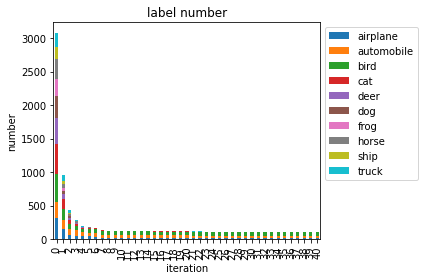

    airplane  automobile  bird  cat  deer  dog  frog  horse  ship  truck
0        334         327   423  371   281  267   197    251   315    315
1        129         150   116   89    74  102    25     65    87    125
2         89         129    85   41    10    9     2     21    17     34
3         67         105    65   22     1    1     0      5     0     22
4         32          81    63   14     0    0     0      0     0      0
5         31          75    63   11     0    0     0      0     0      0
6         31          62    63    9     0    0     0      0     0      0
7          6          62    63    0     0    0     0      0     0      0
8          1          62    63    0     0    0     0      0     0      0
9          1          61    63    0     0    0     0      0     0      0
10         1          61    63    0     0    0     0      0     0      0
11         0          60    62    0     0    0     0      0     0      0
12         0          60    62    0     0    0     

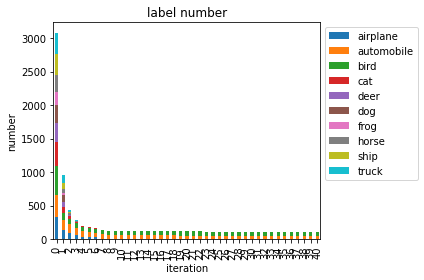

In [0]:
AtoB_train_loss=[]
AtoB_train_acc=[]
AtoB_test_loss=[]
AtoB_test_acc=[]
BtoA_train_loss=[]
BtoA_train_acc=[]
BtoA_test_loss=[]
BtoA_test_acc=[]
#前処理 間違えやすいデータを半分取り出す
print('前処理')
for i in range(2):
  print('%d回目' % i)
  
  model_AtoB=model()
  model_BtoA=model()
  model_AtoB.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])


  model_BtoA.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])
  
  #A->train,B->test
  model_AtoB.fit(x_a,y_a,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  """
  AtoB_train_loss.append(model_AtoB.evaluate(x_a,y_a)[0])
  AtoB_train_acc.append(model_AtoB.evaluate(x_a,y_a)[1])
  AtoB_test_loss.append(model_AtoB.evaluate(x_b,y_b)[0])
  AtoB_test_acc.append(model_AtoB.evaluate(x_b,y_b)[1])
  """
  y_b_pred=model_AtoB.predict_classes(x_b)
  y_b_true=np.argmax(y_b,axis=1)

  data_num_ab=len(x_a)

  # Bの間違い
  B_miss=[]
  for j in range(data_num_ab):
    if y_b_pred[j] != y_b_true[j]:
      B_miss.append(j)

  #B->train,A->test
  model_BtoA.fit(x_b,y_b,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  """
  BtoA_train_loss.append(model_BtoA.evaluate(x_b,y_b)[0])
  BtoA_train_acc.append(model_BtoA.evaluate(x_b,y_b)[1])
  BtoA_test_loss.append(model_BtoA.evaluate(x_a,y_a)[0])
  BtoA_test_acc.append(model_BtoA.evaluate(x_a,y_a)[1])
  """
  y_a_pred=model_BtoA.predict_classes(x_a)
  y_a_true=np.argmax(y_a,axis=1)
  # Aの間違い
  A_miss=[]
  for j in range(data_num_ab):
    if y_a_pred[j] != y_a_true[j]:
      A_miss.append(j)


  random.shuffle(A_miss)
  random.shuffle(B_miss)
    
  length=len(A_miss)-len(B_miss)
  if length>0:
    A_miss=A_miss[length:]
  if length<0:
    B_miss=B_miss[-length:]



  
  if i==0:
    x_a_miss=x_a[A_miss]
    y_a_miss=y_a[A_miss]
    x_b_miss=x_b[B_miss]
    y_b_miss=y_b[B_miss]

  if i>0:
    x_a_miss_tmp=x_a[A_miss]
    x_a_miss=np.concatenate([x_a_miss,x_a_miss_tmp])
    y_a_miss_tmp=y_a[A_miss]
    y_a_miss=np.concatenate([y_a_miss,y_a_miss_tmp])
    x_b_miss_tmp=x_b[B_miss]
    x_b_miss=np.concatenate([x_b_miss,x_b_miss_tmp])
    y_b_miss_tmp=y_b[B_miss]
    y_b_miss=np.concatenate([y_b_miss,y_b_miss_tmp])


  x_a=np.delete(x_a,A_miss,0)
  y_a=np.delete(y_a,A_miss,0)
  x_b=np.delete(x_b,B_miss,0)
  y_b=np.delete(y_b,B_miss,0)


x_a=x_a_miss
y_a=y_a_miss
x_b=x_b_miss
y_b=y_b_miss
data_num_ab=len(x_a)
y_a=np.argmax(y_a,axis=1)
y_b=np.argmax(y_b,axis=1)
y_a_num=[]
y_a_num = [0 for l in range(10)]
y_b_num=[]
y_b_num = [0 for l in range(10)]
for j in range(10):
  for k in range(data_num_ab):
    if y_a[k]==j:
      y_a_num[j]+=1
for j in range(10):
  for k in range(data_num_ab):
    if y_b[k]==j:
      y_b_num[j]+=1
y_a=to_categorical(y_a,10)
y_b=to_categorical(y_b,10)


y_a_num_history.append(y_a_num)
y_b_num_history.append(y_b_num)

#間違えやすいデータで実験
print('本実験')
for i in range(repetition):
  print('%d回目' % i)
  


  model_AtoB=model()
  model_BtoA=model()
  model_AtoB.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])


  model_BtoA.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=learningrate),
        metrics=['accuracy'])
  
  #A->train,B->test
  model_AtoB.fit(x_a,y_a,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  AtoB_train_loss.append(model_AtoB.evaluate(x_a,y_a)[0])
  AtoB_train_acc.append(model_AtoB.evaluate(x_a,y_a)[1])
  AtoB_test_loss.append(model_AtoB.evaluate(x_b,y_b)[0])
  AtoB_test_acc.append(model_AtoB.evaluate(x_b,y_b)[1])
  y_b_pred=model_AtoB.predict_classes(x_b)
  y_b_true=np.argmax(y_b,axis=1)

  

  # Bの間違い
  B_miss=[]
  for j in range(data_num_ab):
    if y_b_pred[j] != y_b_true[j]:
      B_miss.append(j)

  #B->train,A->test
  model_BtoA.fit(x_b,y_b,
    batch_size=batch_s,
    epochs=epoch,
    verbose=1,
    validation_split=0.1
    )
  BtoA_train_loss.append(model_BtoA.evaluate(x_b,y_b)[0])
  BtoA_train_acc.append(model_BtoA.evaluate(x_b,y_b)[1])
  BtoA_test_loss.append(model_BtoA.evaluate(x_a,y_a)[0])
  BtoA_test_acc.append(model_BtoA.evaluate(x_a,y_a)[1])
  y_a_pred=model_BtoA.predict_classes(x_a)
  y_a_true=np.argmax(y_a,axis=1)
  # Aの間違い
  A_miss=[]
  for j in range(data_num_ab):
    if y_a_pred[j] != y_a_true[j]:
      A_miss.append(j)


  random.shuffle(A_miss)
  random.shuffle(B_miss)
    
  length=len(A_miss)-len(B_miss)
  if length>0:
    A_miss=A_miss[length:]
  if length<0:
    B_miss=B_miss[-length:]

  x_a=np.delete(x_a,A_miss,0)
  y_a=np.delete(y_a,A_miss,0)
  x_b=np.delete(x_b,B_miss,0)
  y_b=np.delete(y_b,B_miss,0)

  data_num_ab=len(x_a)

  # ラベルの数え上げ
  y_a=np.argmax(y_a,axis=1)
  y_b=np.argmax(y_b,axis=1)
  y_a_num=[]
  y_a_num = [0 for l in range(10)]
  y_b_num=[]
  y_b_num = [0 for l in range(10)]
  for j in range(10):
    for k in range(data_num_ab):
      if y_a[k]==j:
        y_a_num[j]+=1
  for j in range(10):
    for k in range(data_num_ab):
      if y_b[k]==j:
        y_b_num[j]+=1
  y_a=to_categorical(y_a,10)
  y_b=to_categorical(y_b,10)


  y_a_num_history.append(y_a_num)
  y_b_num_history.append(y_b_num)





import os


SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/acc/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)
with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "w")as f:
  f.writelines(str(AtoB_test_acc))
with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "w")as f:
  f.writelines(str(AtoB_train_acc))
with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "w")as f:
  f.writelines(str(BtoA_test_acc))
with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "w")as f:
  f.writelines(str(BtoA_train_acc))

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/loss/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)
with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "w")as f:
  f.writelines(str(AtoB_test_loss))
with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "w")as f:
  f.writelines(str(AtoB_train_loss))
with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "w")as f:
  f.writelines(str(BtoA_test_loss))
with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "w")as f:
  f.writelines(str(BtoA_train_loss))


import matplotlib.pyplot as plt


fig, ax = plt.subplots()



y1=[]
y2=[]
y3=[]
y4=[]

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/acc/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"

with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)
#print(type(y1))
#print(y1)

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/acc/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"


c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('iteration')
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title('accuracy') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()


fig, ax = plt.subplots()



y1=[]
y2=[]
y3=[]
y4=[]

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/loss/data/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"

with open(SAVE_DATA_DIR_PATH + f"ABtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y1.append(line)

y1=np.ravel(y1)

with open(SAVE_DATA_DIR_PATH + f"ABtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y2.append(line)

y2=np.ravel(y2)

with open(SAVE_DATA_DIR_PATH + f"BAtest.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y3.append(line)

y3=np.ravel(y3)

with open(SAVE_DATA_DIR_PATH + f"BAtrain.text", "r") as f:
  for line in f:
    
    line=line.strip() #前後空白削除
    line=line.replace('\n','') #末尾の\nの削除
    line=line[1:-1]
    line=line.split(",") #分割
    line=[float(s) for s in line]
    y4.append(line)

y4=np.ravel(y4)
#print(type(y1))
#print(y1)

SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/loss/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}"


c1,c2,c3,c4 = "blue","green","red","black"   # 各プロットの色
l1,l2,l3,l4 = "AtoB_test","AtoB_train","BtoA_test","BtoA_train"   # 各ラベル

  # x軸ラベル
ax.set_xlabel('iteration')
ax.set_ylabel('loss')  # y軸ラベル
ax.set_title('loss') # グラフタイトル
# ax.set_aspect('equal') # スケールを揃える
ax.grid()            # 罫線
#ax.set_xlim([0, 5]) # x方向の描画範囲を指定
#ax.set_ylim([0, 1])    # y方向の描画範囲を指定
ax.plot(y1, color=c1, label=l1)
ax.plot(y2, color=c2, label=l2)
ax.plot(y3, color=c3, label=l3)
ax.plot(y4, color=c4, label=l4)
ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定
plt.savefig(SAVE_DATA_DIR_PATH + f".png") # 画像の保存
plt.show()


SAVE_DATA_DIR_PATH = f"/content/drive/My Drive/googlecolab/cifar10/missdata/picture/random{random_AB}_lr{learningrate}_batch{batch_s}_epoch{epoch}_change{change_num}_repe{repetition}_data_num{data_num}/"
if not os.path.exists(SAVE_DATA_DIR_PATH):
    os.mkdir(SAVE_DATA_DIR_PATH)

dataset = pd.DataFrame(y_a_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig(SAVE_DATA_DIR_PATH + f"A_label.png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f"A_label.csv")

dataset = pd.DataFrame(y_b_num_history, 
             columns=['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck'])
print(dataset)
fig, ax = plt.subplots()
ax.set_xlabel('iteration') # x軸ラベル
ax.set_ylabel('number')  # y軸ラベル
ax.set_title('label number') # グラフタイトル
dataset.plot(kind='bar', stacked=True, ax=ax)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()
plt.savefig(SAVE_DATA_DIR_PATH + f"B_label.png") # 画像の保存
plt.show()
dataset.to_csv(SAVE_DATA_DIR_PATH + f"B_label.csv")

In [0]:
print(x_a.shape)
print(A_miss)

(1802, 32, 32, 3)
[4288, 266, 1006, 3376, 3914, 1512, 3167, 2373, 2798, 246, 1267, 4016, 3353, 2801, 2505, 1819, 4246, 1094, 3086, 1872, 3548, 3733, 1133, 2601, 3967, 4167, 818, 1795, 324, 4997, 544, 3570, 2928, 4591, 466, 4976, 2863, 2989, 3440, 1293, 1363, 3155, 878, 4174, 1403, 1190, 446, 4711, 880, 1066, 675, 4676, 4887, 3445, 3956, 1114, 2527, 824, 512, 1250, 1460, 4533, 2096, 3765, 3532, 1843, 2011, 4509, 3766, 3472, 2729, 527, 4220, 2315, 1003, 4673, 3560, 3813, 4472, 268, 1518, 3233, 2570, 2969, 3128, 4640, 3921, 2369, 3827, 1602, 1532, 1493, 804, 2883, 4163, 2653, 949, 3539, 1718, 987, 2281, 35, 4437, 3181, 3229, 323, 870, 2159, 328, 3690, 4106, 2473, 364, 3928, 4204, 1598, 3031, 766, 1449, 2681, 4910, 2139, 2619, 2756, 980, 637, 4108, 174, 2226, 143, 621, 4186, 417, 1159, 2577, 2056, 1728, 2692, 3048, 1773, 69, 21, 1097, 2205, 4637, 192, 890, 1141, 2345, 1596, 1222, 237, 1929, 505, 2772, 1526, 1390, 975, 3214, 4415, 2111, 3693, 366, 4179, 11, 183, 832, 3840, 4806, 603, 55, 48